In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from collections import Counter 
from tqdm import tqdm
from random import seed, randint, choice

from swarm_sim import *

%matplotlib inline 

In [2]:
PATH = '..\data\Traces_Nanosatellites\\track_'
satellites = {}

for i in range(0,100):
    df = pd.read_csv(PATH+str(i)+'.csv', sep=',', header=0)
    df['coords'] = ['x','y','z']
    satellites[i] = df.set_index('coords', drop=True)
    
DURATION = satellites[0].columns.tolist()
CHUNKS = 2000     # Number of timestamps to analyse
NB_NODES = 100

satellites[0].head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


In [3]:
CONNECTION_RANGE = 30000
t = '0'

swarm_data = Swarm(
    connection_range=CONNECTION_RANGE, 
    nodes=[Node(id, node[t].x, node[t].y, node[t].z) for id,node in satellites.items()]
)

print(swarm_data)
neighbor_matrix = swarm_data.neighbor_matrix()

Swarm of 100 node(s), connection range: 30000


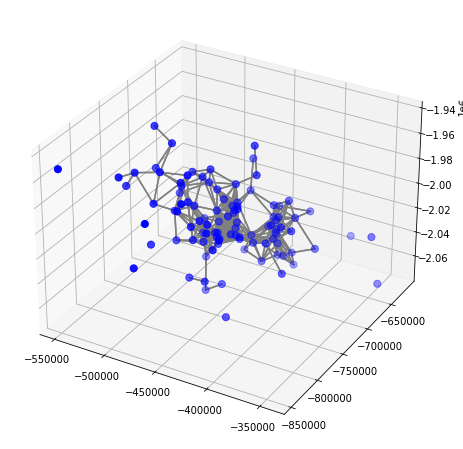

In [4]:
swarm_data.plot_edges()

### Random community assignment

In [5]:
clist = range(10) # List of group IDs
sf = 100 # Number of repetitions

comm_data = {} # Dict(comm_id:list(count))
for i in clist:
    comm_data[i] = []

for i in range(1, sf+1):
    swarm_data.random_community(clist, i)
    communities = [n.community for n in swarm_data.nodes]
    distrib = Counter(communities)
    for k in comm_data.keys():
        comm_data[k].append(distrib[k])
        
for k,v in comm_data.items():
    print(k,v, '\n')

0 [7, 7, 11, 9, 8, 13, 15, 13, 9, 9, 16, 8, 16, 15, 8, 11, 8, 11, 12, 11, 14, 18, 9, 7, 7, 15, 11, 14, 13, 9, 11, 9, 17, 4, 7, 8, 10, 7, 16, 7, 10, 14, 13, 15, 8, 13, 7, 6, 11, 10, 12, 12, 16, 9, 13, 15, 14, 10, 10, 5, 7, 8, 8, 8, 9, 16, 12, 7, 8, 12, 10, 9, 6, 8, 6, 9, 12, 12, 8, 16, 12, 6, 7, 9, 12, 11, 13, 15, 11, 8, 16, 9, 9, 12, 10, 6, 8, 7, 14, 12] 

1 [13, 14, 8, 10, 12, 13, 13, 11, 7, 10, 14, 12, 8, 14, 6, 9, 18, 14, 11, 9, 10, 13, 13, 14, 7, 11, 12, 12, 13, 10, 11, 14, 3, 16, 13, 12, 15, 12, 9, 8, 10, 13, 12, 10, 11, 12, 11, 10, 11, 6, 10, 9, 8, 15, 9, 7, 11, 7, 12, 14, 13, 10, 10, 12, 12, 6, 9, 14, 12, 14, 7, 7, 9, 16, 8, 11, 5, 13, 9, 14, 14, 12, 10, 10, 8, 9, 9, 8, 10, 12, 13, 8, 11, 13, 15, 13, 8, 13, 5, 9] 

2 [9, 12, 10, 9, 13, 11, 9, 8, 17, 11, 8, 9, 5, 7, 8, 6, 8, 17, 9, 12, 7, 6, 8, 10, 9, 7, 12, 7, 10, 7, 7, 5, 7, 9, 7, 11, 6, 9, 7, 8, 11, 7, 9, 9, 12, 7, 10, 10, 9, 9, 12, 11, 8, 14, 14, 6, 8, 9, 7, 8, 8, 9, 11, 8, 5, 9, 12, 11, 10, 8, 15, 13, 11, 7, 8, 10, 10, 12, 1

In [6]:
group_distrib_list = [e for distribs in comm_data.values() for e in distribs]

print('Number of nodes per group\n')
print('Average:', np.mean(group_distrib_list))
print('Median:', np.median(group_distrib_list))
print('Standard deviation:', np.std(group_distrib_list))

Number of nodes per group

Average: 10.0
Median: 10.0
Standard deviation: 3.048278202526797


In [7]:
distrib = Counter(group_distrib_list)

labels = sorted(distrib.keys())
x_pos = np.arange(min(labels), max(labels)+1)
data = []
for k in x_pos:
       x = 0
       if k in labels:
              x = distrib[k]
       data.append(x)

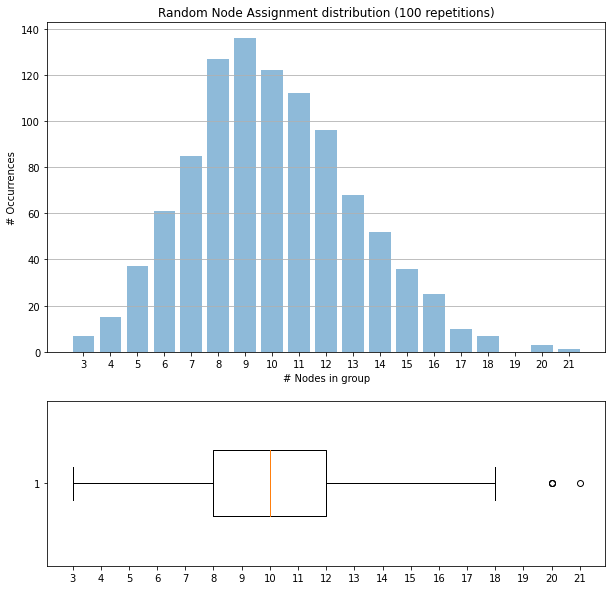

In [9]:
# Build the plot
fig, axes = plt.subplots(nrows=2, figsize=(10,10), gridspec_kw={'height_ratios': [2, 1]})
ax = axes[0] # Plot bar distribution
ax.bar(x_pos, data,
       align='center',
       alpha=0.5)
ax.set_xlabel('# Nodes in group')
ax.set_ylabel('# Occurrences')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Random Node Assignment distribution (100 repetitions)')
ax.yaxis.grid(True)

ax = axes[1] # Boxplot distribution
ax.boxplot(sorted(distrib.elements()),
           widths=0.4,
           vert=False)
ax.set_xticks(x_pos)


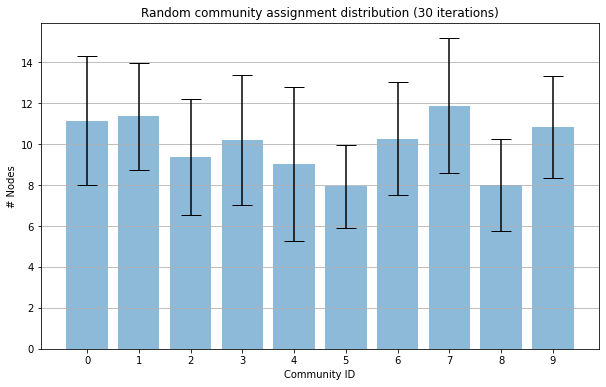

In [41]:
labels = clist
x_pos = np.arange(len(labels))
ctes = [v for v in comm_avg.values()]
errors = [v for v in comm_std.values()]

# Build the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x_pos, ctes,
       yerr=errors,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xlabel('Community ID')
ax.set_ylabel('# Nodes')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Random community assignment distribution (30 iterations)')
ax.yaxis.grid(True)

### Metrics analysis for one timestamp
- Degree
- Clustering coefficient
- Number of connected components

In [10]:
swarms = [] #List(Swarm)

for i in range(1, sf+1): #Same number of repetitions
    swarm_data.random_community(clist, i)
    for j in clist:
        swarm = Swarm(connection_range=30000,
                        nodes=[node for node in swarm_data.nodes if node.community==j])
        neighbor_matrix = swarm.neighbor_matrix()
        swarms.append(swarm)
        
len(swarms)

1000

In [11]:
def DFSUtil(sw, temp, node, visited):
    visited[node.id] = True
    temp.append(node.id) # Store the vertex to list
    for n in node.neighbors:
        if n in sw.nodes:
            if visited[n.id] == False:
                temp = DFSUtil(sw, temp, n, visited)
    return temp

def connected_components(sw):
        """
        Function to define the connected components in the network, and print their number.

        Returns:
            cc (List(List(int))): nested list of node ids for each connected component
        """
        visited = {}
        for node in sw.nodes:
            visited[node.id] = False
        cc = []
        for node in sw.nodes:
            if visited[node.id]==False:
                temp = []
                cc.append(DFSUtil(sw, temp, node, visited))
        return cc

In [12]:
degree = np.mean([np.mean(sw.degree()) for sw in swarms])
cluster_coef = np.mean([np.mean(sw.cluster_coef()) for sw in swarms])    
ccs = np.mean([len(connected_components(sw)) for sw in swarms])

ref_deg = np.mean(swarm_data.degree())
ref_cluster = np.mean(swarm_data.cluster_coef())
ref_cc = len(connected_components(swarm_data))

In [13]:
x = 2
print('Reference values (whole swarm)')
print('\tAverage degree:', round(ref_deg, x))
print('\tAverage clustering coefficient:', round(ref_cluster, x))
print('\tNumber of connected components:', ref_cc)

print('\nGroup values')
print('\tAverage degree:', round(degree, x))
print('\tAverage clustering coefficient:', round(cluster_coef, x))
print('\tAverage number of connected components:', round(ccs, x))

Reference values (whole swarm)
	Average degree: 8.54
	Average clustering coefficient: 0.48
	Number of connected components: 10

Group values
	Average degree: 8.52
	Average clustering coefficient: 0.48
	Average number of connected components: 6.62


In [14]:
data_deg = np.array([np.mean(sw.degree()) for sw in swarms])
data_cluster = np.array([np.mean(sw.cluster_coef()) for sw in swarms])
data_cc = np.array([len(connected_components(sw)) for sw in swarms])

std_deg = np.sqrt(np.mean((data_deg - ref_deg)**2))
std_cluster = np.sqrt(np.mean((data_cluster - ref_cluster)**2))
#std_cc = np.sqrt(np.mean((data_cc - ref_cc)**2))
std_cc = np.std(data_cc)

print('Standard deviations with respect to reference values')
print('\tDegree:', round(std_deg, 2))
print('\tClustering coefficient:', round(std_cluster, 2))

print('\nStandard deviation of the number of connected components:', round(std_cc, 2))

Standard deviations with respect to reference values
	Degree: 2.07
	Clustering coefficient: 0.09

Standard deviation of the number of connected components: 1.99


## Temporal evolution
- Network size (NS)
- Average degree (AD)
- Graph density (GD): ratio of observed edges over maximum possible number of edges
- Average clustering coefficient (ACC): ratio of observed edges in the neighborhood over maximum possible number of edges, averaged

TODO: Betweeness centrality (BC): number of shortest paths a node is involved in

In [3]:
def graph_density(swarm):
    N = len(swarm.nodes)
    max_edges = N*(N-1)/2
    if max_edges == 0:
        return 0
    edges = 0
    for n in swarm.nodes:
        common_nodes = set(n.neighbors).intersection(swarm.nodes)
        edges += len(common_nodes)
    return edges/(2*max_edges) # Divide by 2 because each edge is counted twice

def reset_groups(sw):
    for node in sw.nodes:
        node.set_community(-1)


In [4]:
CONNECTION_RANGE = 30000
swarm_topo = {}
time = 1800

for t in range(time):
    swarm_topo[t] = Swarm(
        connection_range=CONNECTION_RANGE, 
        nodes=[Node(id, node[str(t)].x, node[str(t)].y, node[str(t)].z) for id,node in satellites.items()]
    )

print(swarm_topo[0])

for t in swarm_topo.keys():
    neighbor_matrix = swarm_topo[t].neighbor_matrix()

Swarm of 100 node(s), connection range: 30000


### Random Node Sampling (RNS)

In [5]:
# Random Node Sampling

clist = range(10) # List of group IDs
sf = 50 # Number of repetitions

groups = {} # Dict(timestamp:comm_data)
with tqdm(total=len(swarm_topo.keys()), desc='Random Node Sampling') as pbar:
    for t, swarm in swarm_topo.items():
        comm_data = {} # Dict(comm_id:list(count))
        for i in clist:
            comm_data[i] = []

        for i in range(sf*t, sf*(t+1)):
            swarm.random_community(clist, i)
            communities = [n.community for n in swarm.nodes]
            distrib = Counter(communities)
            for k in comm_data.keys():
                comm_data[k].append(distrib[k])
        groups[t] = comm_data
        pbar.update(1)

Random Node Sampling: 100%|██████████| 1800/1800 [01:58<00:00, 15.25it/s]


In [6]:
# Separate groups into swarms
group_swarms = {} # Dict(timestamp:swarms)

for t,swarm in swarm_topo.items():
    swarms = [] #List(Swarm)
    for j in clist:
        sw = Swarm(connection_range=30000,
                        nodes=[node for node in swarm.nodes if node.community==j])
        neighbor_matrix = sw.neighbor_matrix()
        swarms.append(sw)
    group_swarms[t] = swarms
    
print(group_swarms[0][0])

Swarm of 11 node(s), connection range: 30000


In [7]:
# Reference temporal evolution: Average Degree, Graph Density, Average Clustering Coefficient
ref_ad, ref_gd, ref_acc = [], [], []

for t,swarm in swarm_topo.items():
    ref_ad.append(np.mean(swarm.degree()))
    ref_gd.append(graph_density(swarm))
    ref_acc.append(np.mean(swarm.cluster_coef()))

In [8]:
# Group temporal evolution: Average Degree, Graph Density, Average Clustering Coefficient
group_ad, group_gd, group_acc = [], [], []

for t,swarms in group_swarms.items():
    group_ad.append(np.mean([np.mean(sw.degree()) for sw in swarms]))
    group_gd.append(np.mean([graph_density(sw) for sw in swarms]))
    group_acc.append(np.mean([np.mean(sw.cluster_coef()) for sw in swarms]))  
    
len(ref_ad) == len(group_ad)

True

In [11]:
avg_group_ad = np.mean(group_ad)
avg_group_acc = np.mean(group_acc)    
avg_group_gd = np.mean(group_gd)

avg_ref_ad = np.mean(ref_ad)
avg_ref_acc = np.mean(ref_acc)
avg_ref_gd = np.mean(ref_gd)

std_ad = np.sqrt(np.mean((group_ad - avg_ref_ad)**2))
std_acc = np.sqrt(np.mean((group_acc - avg_ref_acc)**2))
std_gd = np.sqrt(np.mean((group_gd - avg_ref_gd)**2))

x = 2
print('Reference values (whole swarm)')
print('\tAverage degree:', round(avg_ref_ad, x))
print('\tAverage clustering coefficient:', round(avg_ref_acc, x))
print('\tGraph Density:', round(avg_ref_gd, x))

print('\nGroup values')
print('\tAverage degree:', round(avg_group_ad, x))
print('\tAverage clustering coefficient:', round(avg_group_acc, x))
print('\tGraph Density:', round(avg_group_gd, x))

print('\nStandard deviations')
print('\tAD:', round(std_ad, x))
print('\tACC:', round(std_acc, x))
print('\tGD:', round(std_gd, x))

Reference values (whole swarm)
	Average degree: 8.17
	Average clustering coefficient: 0.5
	Graph Density: 0.08

Group values
	Average degree: 8.17
	Average clustering coefficient: 0.5
	Graph Density: 0.08

Standard deviations
	AD: 1.8
	ACC: 0.05
	GD: 0.02


Text(0.5, 0.98, 'Temporal evolution of metrics as a swarm and as groups (RNS)')

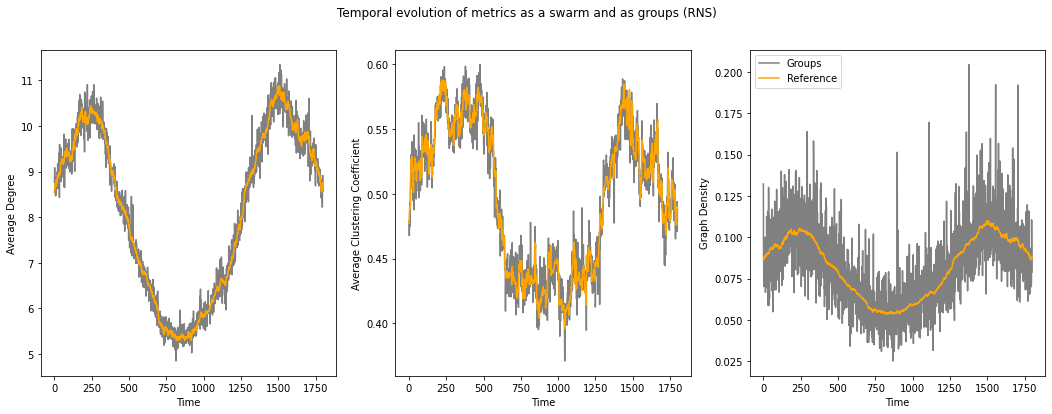

In [26]:
# Plot the group/reference evolution
fig,axes = plt.subplots(ncols=3, figsize=(18,6))
idx = np.arange(len(ref_ad))

ax = axes[0]
ax.plot(idx, group_ad, c='gray')
ax.plot(idx, ref_ad, c='orange')
ax.set_xlabel('Time')
ax.set_ylabel('Average Degree')

ax = axes[1]
ax.plot(idx, group_acc, c='gray')
ax.plot(idx, ref_acc, c='orange')
ax.set_xlabel('Time')
ax.set_ylabel('Average Clustering Coefficient')

ax = axes[2]
ax.plot(idx, group_gd, c='gray')
ax.plot(idx, ref_gd, c='orange')
ax.set_xlabel('Time')
ax.set_ylabel('Graph Density')
ax.legend(['Groups','Reference'])

plt.suptitle('Temporal evolution of metrics as a swarm and as groups (RNS)')

In [88]:
comm_data = groups[1] # Dict(comm_id:list(count))
group_distrib_list = [e for distribs in comm_data.values() for e in distribs]

print('Number of nodes per group\n')
print('Average:', np.mean(group_distrib_list))
print('Median:', np.median(group_distrib_list))
print('Standard deviation:', np.std(group_distrib_list))

distrib = Counter(group_distrib_list)

labels = sorted(distrib.keys())
x_pos = np.arange(min(labels), max(labels)+1)
data = []
for k in x_pos:
       x = 0
       if k in labels:
              x = distrib[k]
       data.append(x)

Number of nodes per group

Average: 10.0
Median: 10.0
Standard deviation: 2.9400680264238783


In [89]:
sorted(distrib.keys())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]

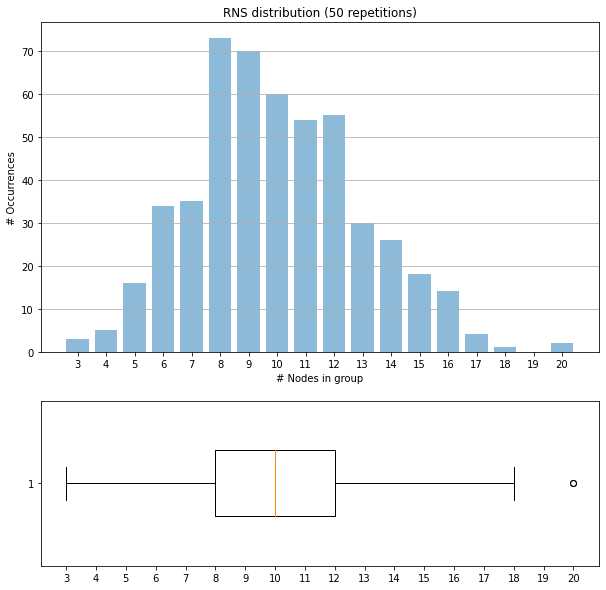

In [90]:
# Build the plot
fig, axes = plt.subplots(nrows=2, figsize=(10,10), gridspec_kw={'height_ratios': [2, 1]})
ax = axes[0] # Plot bar distribution
ax.bar(x_pos, data,
       align='center',
       alpha=0.5)
ax.set_xlabel('# Nodes in group')
ax.set_ylabel('# Occurrences')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('RNS distribution (50 repetitions)')
ax.yaxis.grid(True)

ax = axes[1] # Boxplot distribution
ax.boxplot(sorted(distrib.elements()),
           widths=0.4,
           vert=False)
ax.set_xticks(x_pos)

### Multi-Dimensional Random Walk (MDRW)

In [12]:
CONNECTION_RANGE = 30000
swarm_topo = {}
time = 1800

for t in range(time):
    swarm_topo[t] = Swarm(
        connection_range=CONNECTION_RANGE, 
        nodes=[Node(id, node[str(t)].x, node[str(t)].y, node[str(t)].z) for id,node in satellites.items()]
    )

print(swarm_topo[0])

for t in swarm_topo.keys():
    neighbor_matrix = swarm_topo[t].neighbor_matrix()

Swarm of 100 node(s), connection range: 30000


In [13]:
from random import sample

In [60]:
def random_jump(sw, s=1, overlap=False):
    seed(s)
    search_list = sw.nodes
    if not overlap:
        search_list = [n for n in sw.nodes if n.community==-1]
    return choice(search_list)
    

def random_walk(node, s=0, overlap=False):
    seed(s)
    search_list = node.neighbors
    if not overlap:
        search_list = [n for n in node.neighbors if n.community==-1]
    return choice(search_list)


def MDRW(sw, n=10, s=1, overlap=False):
    sources = sample(sw.nodes, n) # Initial random sources
    swarms = {} # Dict(group ID:Swarm)
    for i,src in enumerate(sources): # Initialize swarms
        src.set_community(i)
        swarms[i] = Swarm(sw.connection_range, nodes=[src])
    free_nodes = [n for n in sw.nodes if n.community==-1]
    while free_nodes: # Spread paths to desired length
        for k in swarms.keys():
            n_i = swarms[k].nodes[-1] # Current node
            free_neighbors = set(free_nodes).intersection(n_i.neighbors)
            if free_neighbors: # At least one unassigned neighbor
                n_j = random_walk(n_i, i, overlap) # Next node
            else:
                n_j = random_jump(sw, s, overlap) # If no neighbor, perform random jump in the graph
            n_j.set_community(n_i.community)
            swarms[k].add_node(n_j) 
            free_nodes.remove(n_j)
    return swarms

In [61]:
# Multi-Dimensional Random Walk

group_ids = range(10) # List of group IDs
sf = 50 # Number of repetitions

groups_mdrw = {} # Dict(timestamp:comm_data)
with tqdm(total=len(swarm_topo.keys()), desc='MDRW') as pbar:
    for t, swarm in swarm_topo.items():
        reset_groups(swarm)
        comm_data = {} # Dict(comm_id:list(count))
        for i in group_ids:
            comm_data[i] = []
        comm_data[-1] = [] # Possible unassigned nodes

        for i in range(sf*t, sf*(t+1)):
            MDRW(swarm, s=i)
            communities = [n.community for n in swarm.nodes]
            distrib = Counter(communities)
            for k in comm_data.keys():
                comm_data[k].append(distrib[k])
        groups_mdrw[t] = comm_data
        pbar.update(1)

MDRW: 100%|██████████| 1800/1800 [00:07<00:00, 228.69it/s]


In [62]:
# Separate groups into swarms
group_swarms_mdrw = {} # Dict(timestamp:swarms)
group_unassigned = {} # Dict(timestamp:Swarm)

for t,swarm in swarm_topo.items():
    swarms = [] #List(Swarm)
    for j in group_ids:
        sw = Swarm(connection_range=30000,
                        nodes=[node for node in swarm.nodes if node.community==j])
        neighbor_matrix = sw.neighbor_matrix()
        swarms.append(sw)
    group_swarms_mdrw[t] = swarms
    group_unassigned[t] = Swarm(connection_range=30000,
                             nodes=[node for node in swarm.nodes if node.community==-1])

In [63]:
for sw in group_swarms_mdrw[0]:
    print(sw)
    if sw.nodes:
        print(sw.nodes[0])

swu = group_unassigned[0]
print('\n', swu)
if swu.nodes:
    print(swu.nodes[0])

Swarm of 11 node(s), connection range: 30000
Node ID 0 (-485074.678663292,-706653.009498108,-2026363.46336954) has 4 neighbor(s)	Community: 0
Swarm of 8 node(s), connection range: 30000
Node ID 6 (-423822.113747743,-693079.060304235,-2033733.90184913) has 16 neighbor(s)	Community: 1
Swarm of 10 node(s), connection range: 30000
Node ID 1 (-416730.457242747,-711449.610260252,-2013985.12080213) has 6 neighbor(s)	Community: 2
Swarm of 11 node(s), connection range: 30000
Node ID 4 (-457421.163517887,-666330.96572567,-1985844.42258975) has 1 neighbor(s)	Community: 3
Swarm of 8 node(s), connection range: 30000
Node ID 11 (-458066.47668205,-734366.762447103,-2024861.7874912) has 16 neighbor(s)	Community: 4
Swarm of 11 node(s), connection range: 30000
Node ID 8 (-417276.140034617,-675866.187442782,-2007666.08226784) has 7 neighbor(s)	Community: 5
Swarm of 12 node(s), connection range: 30000
Node ID 9 (-450570.052895477,-709565.244861892,-2007467.58188223) has 18 neighbor(s)	Community: 6
Swarm o

In [64]:
# Reference temporal evolution: Average Degree, Graph Density, Average Clustering Coefficient
ref_ad, ref_gd, ref_acc = [], [], []

for t,swarm in swarm_topo.items():
    ref_ad.append(np.mean(swarm.degree()))
    ref_gd.append(graph_density(swarm))
    ref_acc.append(np.mean(swarm.cluster_coef()))
    
# Group temporal evolution: Average Degree, Graph Density, Average Clustering Coefficient
group_ad, group_gd, group_acc = [], [], []

for t,swarms in group_swarms_mdrw.items():
    group_ad.append(np.mean([np.mean(sw.degree()) for sw in swarms]))
    group_gd.append(np.mean([graph_density(sw) for sw in swarms]))
    group_acc.append(np.mean([np.mean(sw.cluster_coef()) for sw in swarms]))  
    
len(ref_ad) == len(group_ad)

True

In [65]:
avg_group_ad = np.nanmean(group_ad)
avg_group_acc = np.nanmean(group_acc)    
avg_group_gd = np.nanmean(group_gd)

avg_ref_ad = np.mean(ref_ad)
avg_ref_acc = np.mean(ref_acc)
avg_ref_gd = np.mean(ref_gd)

std_ad = np.sqrt(np.nanmean((group_ad - avg_ref_ad)**2))
std_acc = np.sqrt(np.nanmean((group_acc - avg_ref_acc)**2))
std_gd = np.sqrt(np.nanmean((group_gd - avg_ref_gd)**2))

x = 2
print('Reference values (whole swarm)')
print('\tAverage degree:', round(avg_ref_ad, x))
print('\tAverage clustering coefficient:', round(avg_ref_acc, x))
print('\tGraph Density:', round(avg_ref_gd, x))

print('\nGroup values')
print('\tAverage degree:', round(avg_group_ad, x))
print('\tAverage clustering coefficient:', round(avg_group_acc, x))
print('\tGraph Density:', round(avg_group_gd, x))

print('\nStandard deviations')
print('\tAD:', round(std_ad, x))
print('\tACC:', round(std_acc, x))
print('\tGD:', round(std_gd, x))

print('\nVariation coefficients')
print('\tAD:', round(std_ad/avg_group_ad, x+2))
print('\tACC:', round(std_acc/avg_group_acc, x+2))
print('\tGD:', round(std_gd/avg_group_gd, x+2))

Reference values (whole swarm)
	Average degree: 8.17
	Average clustering coefficient: 0.5
	Graph Density: 0.08

Group values
	Average degree: 8.17
	Average clustering coefficient: 0.5
	Graph Density: 0.08

Standard deviations
	AD: 1.8
	ACC: 0.05
	GD: 0.02

Variation coefficients
	AD: 0.2201
	ACC: 0.1099
	GD: 0.2709


In [66]:
data = groups_mdrw[0][-1] # Dict(comm_id:list(count))

print('Number of nodes per unassigned group\n')
print('Average:', np.mean(data))
print('Median:', np.median(data))
print('Standard deviation:', np.std(data))

Number of nodes per unassigned group

Average: 0.0
Median: 0.0
Standard deviation: 0.0


Text(0.5, 0.98, 'Temporal evolution of metrics as a swarm and as groups (MDRW)')

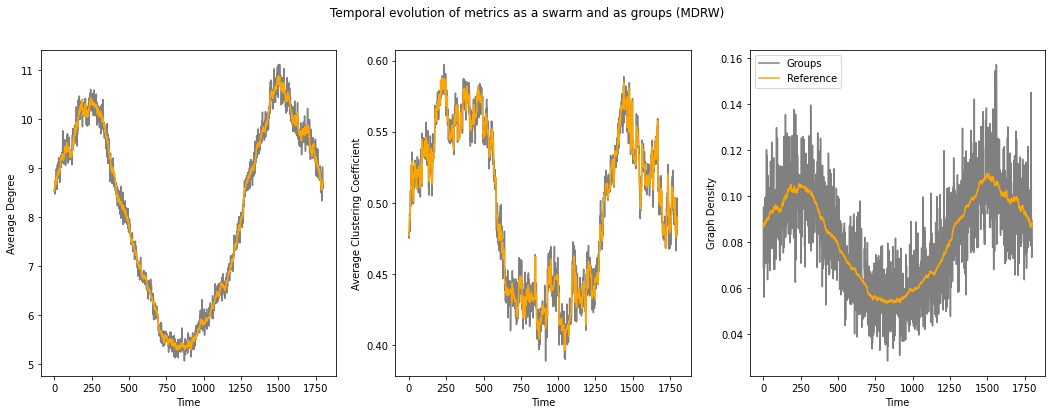

In [67]:
# Plot the group/reference evolution
fig,axes = plt.subplots(ncols=3, figsize=(18,6))
idx = np.arange(len(ref_ad))

ax = axes[0]
ax.plot(idx, group_ad, c='gray')
ax.plot(idx, ref_ad, c='orange')
ax.set_xlabel('Time')
ax.set_ylabel('Average Degree')

ax = axes[1]
ax.plot(idx, group_acc, c='gray')
ax.plot(idx, ref_acc, c='orange')
ax.set_xlabel('Time')
ax.set_ylabel('Average Clustering Coefficient')

ax = axes[2]
ax.plot(idx, group_gd, c='gray')
ax.plot(idx, ref_gd, c='orange')
ax.set_xlabel('Time')
ax.set_ylabel('Graph Density')
ax.legend(['Groups','Reference'])

plt.suptitle('Temporal evolution of metrics as a swarm and as groups (MDRW)')

In [76]:
comm_data = groups_mdrw[1] # Dict(comm_id:list(count))
group_distrib_list = [e for k,distribs in comm_data.items() for e in distribs if k!=-1]

print('Number of nodes per group\n')
print('Average:', np.mean(group_distrib_list))
print('Median:', np.median(group_distrib_list))
print('Standard deviation:', np.std(group_distrib_list))
print(sorted(distrib.keys()))

distrib = Counter(group_distrib_list)

labels = sorted(distrib.keys())
x_pos = np.arange(min(labels), max(labels)+1)
data = []
for k in x_pos:
       x = 0
       if k in labels:
              x = distrib[k]
       data.append(x)

Number of nodes per group

Average: 10.0
Median: 10.0
Standard deviation: 1.8536450577173613
[0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


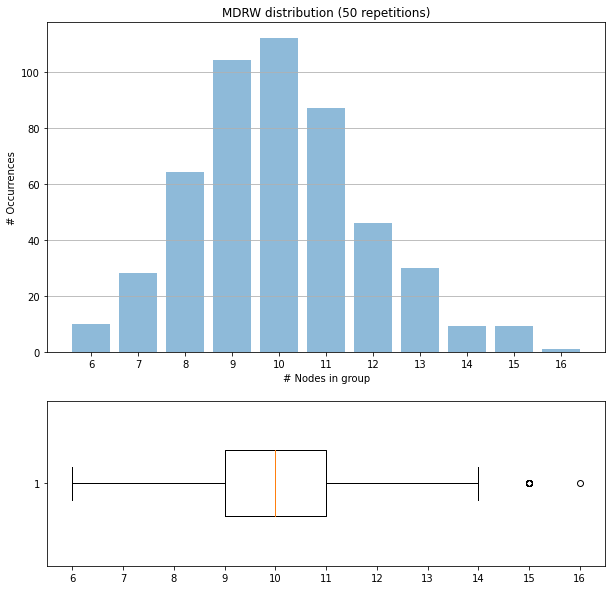

In [77]:
# Build the plot
fig, axes = plt.subplots(nrows=2, figsize=(10,10), gridspec_kw={'height_ratios': [2, 1]})
ax = axes[0] # Plot bar distribution
ax.bar(x_pos, data,
       align='center',
       alpha=0.5)
ax.set_xlabel('# Nodes in group')
ax.set_ylabel('# Occurrences')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('MDRW distribution (50 repetitions)')
ax.yaxis.grid(True)

ax = axes[1] # Boxplot distribution
ax.boxplot(sorted(distrib.elements()),
           widths=0.4,
           vert=False)
ax.set_xticks(x_pos)

## Random Jump Sample

In [35]:
sample = swarm_data.RD_sample(s=3, rho=0.5, x=10)
print(sample)

for n in sample.nodes:
    print(n)

Swarm of 17 node(s), connection range: 30000
Node ID 75 (-460906.191931025,-696867.737112933,-2019954.11729961) has 12 neighbor(s)
Node ID 69 (-418943.581316989,-660998.490948178,-2066428.89277185) has 5 neighbor(s)
Node ID 30 (-427959.488377566,-678753.5060083,-2024893.78965431) has 12 neighbor(s)
Node ID 42 (-450952.902645269,-710054.410536799,-2020571.46456492) has 21 neighbor(s)
Node ID 70 (-453771.463342908,-707451.881877579,-2026980.60100715) has 17 neighbor(s)
Node ID 77 (-440508.738259234,-669316.570991654,-2036346.91962709) has 14 neighbor(s)
Node ID 9 (-450570.052895477,-709565.244861892,-2007467.58188223) has 18 neighbor(s)
Node ID 62 (-427089.318055498,-677293.984289381,-2053876.58278305) has 12 neighbor(s)
Node ID 6 (-423822.113747743,-693079.060304235,-2033733.90184913) has 16 neighbor(s)
Node ID 33 (-448233.574068356,-717533.949100457,-2027625.52938778) has 23 neighbor(s)
Node ID 68 (-425287.847273978,-685153.724397357,-2031865.57457557) has 18 neighbor(s)
Node ID 39 (-4

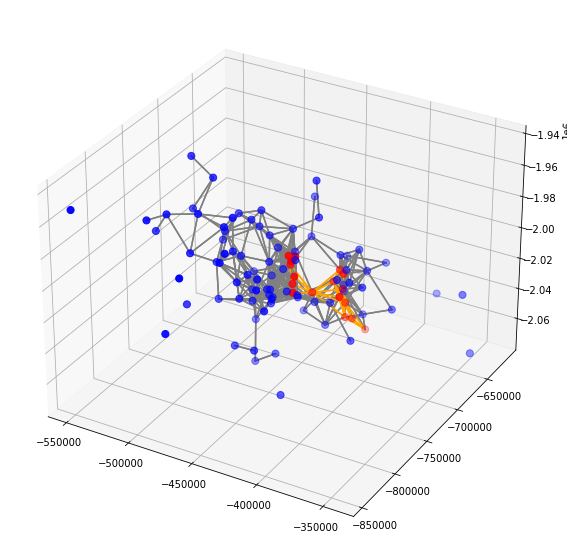

In [36]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
swarm = swarm_data

x_data, x_sample = [], []
y_data, y_sample = [], []
z_data, z_sample = [], []

for node in swarm.nodes:
    if node in sample.nodes:
        x_sample.append(node.x)
        y_sample.append(node.y)
        z_sample.append(node.z)
    else:
        x_data.append(node.x)
        y_data.append(node.y)
        z_data.append(node.z)

ax.scatter(x_data, y_data, z_data, c='blue', s=50)
ax.scatter(x_sample, y_sample, z_sample, c='red', s=50)

for node in swarm.nodes:
    for n in node.neighbors:
        if node in sample.nodes and n in sample.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')
        else:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='gray')

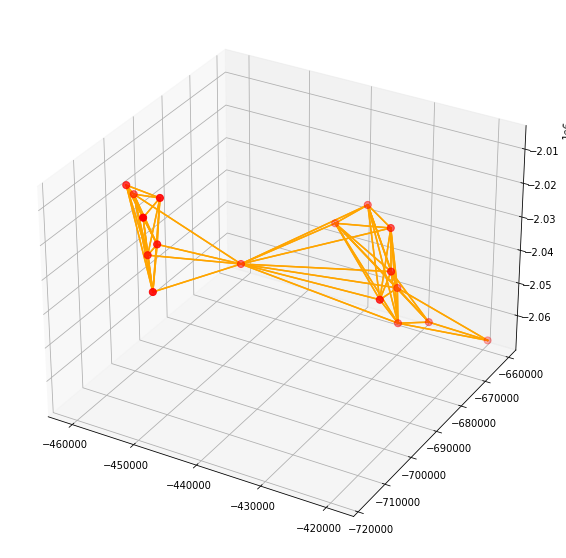

In [37]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x_data = [node.x for node in sample.nodes]
y_data = [node.y for node in sample.nodes]
z_data = [node.z for node in sample.nodes]
ax.scatter(x_data, y_data, z_data, c='red', s=50)

for node in sample.nodes:
    for n in node.neighbors:
        if n in sample.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')

In [38]:
def random_sample(swarm, rho=0.33, x=1): 
    seeds = swarm.random_jump(1) # Initial random seed
    sample = Swarm(swarm.connection_range, nodes=seeds)
    while len(sample.nodes) < x:
        new_seeds = []
        for w in seeds:
            neigh = w.neighbors
            new_seeds.extend(neigh[:int(np.ceil(len(neigh)*rho))]) # Keep first rho nodes
        for node in list(set(new_seeds)):  # Remove duplicates and add to sample
            sample.add_node(node)
        seeds = new_seeds
        if [n.degree() for n in seeds] == [1]*len(seeds): # If all seeds are leaves
            seeds = swarm.random_jump(1) # Perform random jump again
    return sample


In [45]:
sample_rand = random_sample(swarm_data, rho=0.2, x=10)
print(sample_rand)

for n in sample_rand.nodes:
    print(n)

Swarm of 10 node(s), connection range: 30000
Node ID 17 (-449626.879830037,-717156.33612937,-2007519.44783608) has 22 neighbor(s)
Node ID 9 (-450570.052895477,-709565.244861892,-2007467.58188223) has 18 neighbor(s)
Node ID 19 (-469605.484619407,-708682.82459046,-2024723.26970388) has 16 neighbor(s)
Node ID 7 (-463822.377904549,-710055.708861518,-2004695.14938024) has 15 neighbor(s)
Node ID 11 (-458066.47668205,-734366.762447103,-2024861.7874912) has 16 neighbor(s)
Node ID 5 (-454635.955971816,-739467.088967822,-2018777.33234731) has 16 neighbor(s)
Node ID 0 (-485074.678663292,-706653.009498108,-2026363.46336954) has 4 neighbor(s)
Node ID 27 (-440943.643999818,-724705.966738243,-2024699.57585678) has 19 neighbor(s)
Node ID 24 (-458650.714684382,-736440.663221295,-2020757.15078701) has 15 neighbor(s)
Node ID 1 (-416730.457242747,-711449.610260252,-2013985.12080213) has 6 neighbor(s)


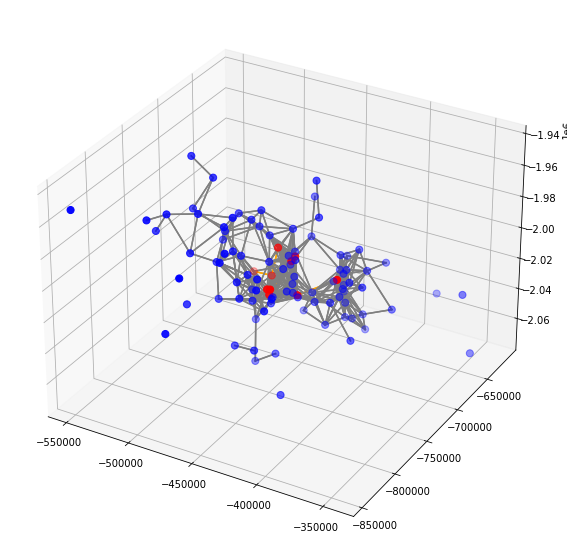

In [46]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
s1 = swarm_data
s2 = sample_rand

x_data, x_sample = [], []
y_data, y_sample = [], []
z_data, z_sample = [], []

for node in s1.nodes:
    if node in s2.nodes:
        x_sample.append(node.x)
        y_sample.append(node.y)
        z_sample.append(node.z)
    else:
        x_data.append(node.x)
        y_data.append(node.y)
        z_data.append(node.z)

ax.scatter(x_data, y_data, z_data, c='blue', s=50)
ax.scatter(x_sample, y_sample, z_sample, c='red', s=50)

for node in s1.nodes:
    for n in node.neighbors:
        if node in s2.nodes and n in s2.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')
        else:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='gray')

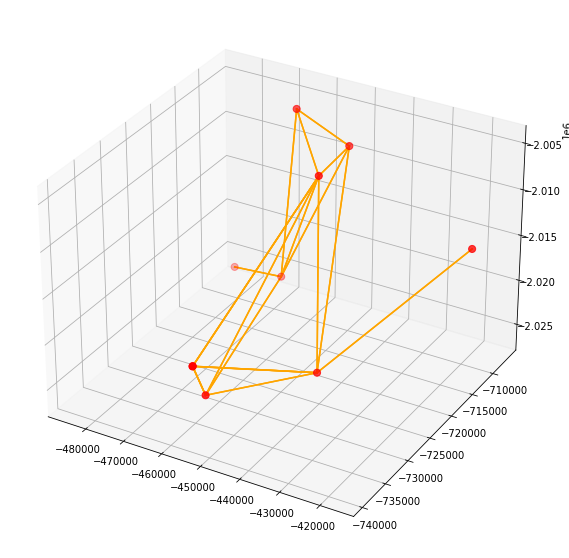

In [47]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
swarm = sample_rand

x_data = [node.x for node in swarm.nodes]
y_data = [node.y for node in swarm.nodes]
z_data = [node.z for node in swarm.nodes]
ax.scatter(x_data, y_data, z_data, c='red', s=50)

for node in swarm.nodes:
    for n in node.neighbors:
        if n in swarm.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')